In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from pathlib import Path
from scipy.optimize import curve_fit
import math
import CMC_helper_function as cmc

In [2]:
all_data = pd.read_csv(Path("processed_data/all_CMC_data.csv"))
all_data

,334_373,334_384,ratio,surfactant_1,assay,time,replicate,concentration,analysis,surfactant_1_ratio,surfactant_2,surfactant_2_ratio
0,133296.0,167994.0,0.793457,NaDC,b,5,3,2.135000,fine,1.00,NaN,0.00
1,121709.0,150630.0,0.808000,NaDC,b,5,3,2.756273,fine,1.00,NaN,0.00
2,143249.0,175407.0,0.816666,NaDC,b,5,3,3.558333,fine,1.00,NaN,0.00
3,153011.0,181410.0,0.843454,NaDC,b,5,3,4.003125,fine,1.00,NaN,0.00
4,117571.0,146014.0,0.805204,NaDC,b,5,3,4.536875,fine,1.00,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8923,78533.0,106255.0,0.739099,TTAB,NaN,10,3,5.360000,rough_rough,0.95,CAPB,0.05
8924,73970.0,101745.0,0.727014,TTAB,NaN,10,3,7.650000,rough_rough,0.95,CAPB,0.05
8925,69795.0,97601.0,0.715105,TTAB,NaN,10,3,10.917000,rough_rough,0.95,CAPB,0.05
8926,69465.0,95048.0,0.730841,TTAB,NaN,10,3,15.579000,rough_rough,0.95,CAPB,0.05


In [3]:
single_CMC = all_data[all_data['surfactant_2_ratio'] == 0 ]
single_CMC

,334_373,334_384,ratio,surfactant_1,assay,time,replicate,concentration,analysis,surfactant_1_ratio,surfactant_2,surfactant_2_ratio
0,133296.0,167994.0,0.793457,NaDC,b,5,3,2.135000,fine,1.0,NaN,0.0
1,121709.0,150630.0,0.808000,NaDC,b,5,3,2.756273,fine,1.0,NaN,0.0
2,143249.0,175407.0,0.816666,NaDC,b,5,3,3.558333,fine,1.0,NaN,0.0
3,153011.0,181410.0,0.843454,NaDC,b,5,3,4.003125,fine,1.0,NaN,0.0
4,117571.0,146014.0,0.805204,NaDC,b,5,3,4.536875,fine,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4315,133659.0,178963.0,0.746853,CAPB,c,0,3,1.070000,rough,1.0,NaN,0.0
4316,124160.0,172875.0,0.718207,CAPB,c,0,3,1.526000,rough,1.0,NaN,0.0
4317,139325.0,191553.0,0.727344,CAPB,c,0,3,2.178000,rough,1.0,NaN,0.0
4318,141145.0,194804.0,0.724549,CAPB,c,0,3,3.108000,rough,1.0,NaN,0.0


In [4]:
mixed_CMC = all_data[all_data['analysis'] == 'fine_fine' ]

#mixed_CMC = all_data[all_data['surfactant_2_ratio'] != 0 ]

mixed_CMC

,334_373,334_384,ratio,surfactant_1,assay,time,replicate,concentration,analysis,surfactant_1_ratio,surfactant_2,surfactant_2_ratio
4356,171797.0,214091.0,0.802448,SDS,NaN,10,1,5.263688,fine_fine,0.05,NaC,0.95
4357,157552.0,191330.0,0.823457,SDS,NaN,10,1,6.795392,fine_fine,0.05,NaC,0.95
4358,167814.0,205246.0,0.817624,SDS,NaN,10,1,8.772814,fine_fine,0.05,NaC,0.95
4359,170005.0,208609.0,0.814946,SDS,NaN,10,1,9.869416,fine_fine,0.05,NaC,0.95
4360,173849.0,240084.0,0.724117,SDS,NaN,10,1,11.185338,fine_fine,0.05,NaC,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...
8743,60700.0,81965.0,0.740560,TTAB,NaN,10,3,1.703236,fine_fine,0.50,CAPB,0.50
8744,63834.0,86516.0,0.737829,TTAB,NaN,10,3,1.851343,fine_fine,0.50,CAPB,0.50
8745,68681.0,93716.0,0.732863,TTAB,NaN,10,3,2.221612,fine_fine,0.50,CAPB,0.50
8746,69810.0,95409.0,0.731692,TTAB,NaN,10,3,2.868089,fine_fine,0.50,CAPB,0.50


/Users/zeqing/0_Github/SDL5_CMC/CMC/All_data/CMC_helper_function.py:128: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(boltzmann, conc, ratio, p0, maxfev=5000)


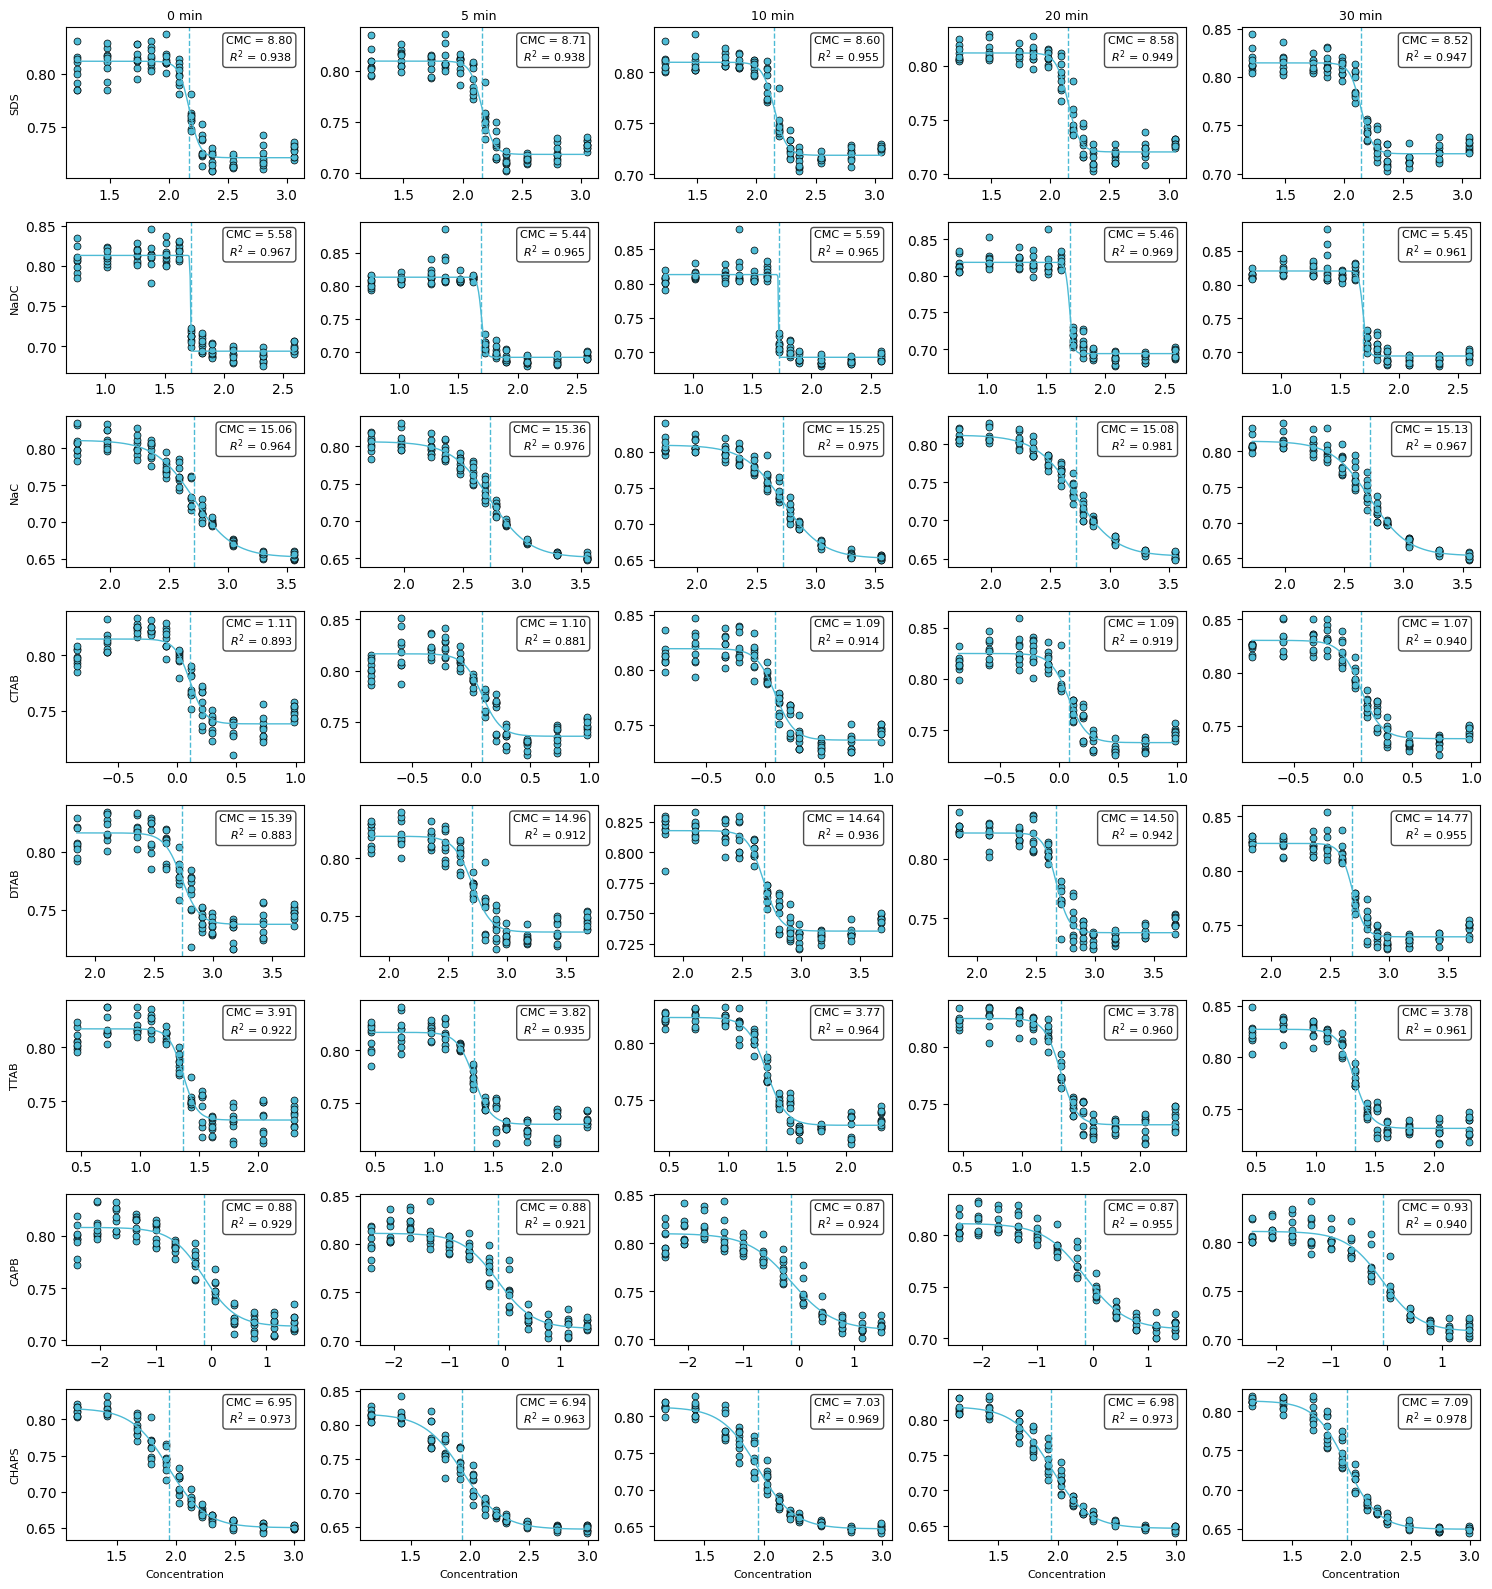

In [5]:
COMBINE_ASSAYS = True   # ← set True to combine all assays before fitting
# ————————————————————

# Load data
df = single_CMC.copy()

# Column mappings
I1_COL    = '334_373'
I3_COL    = '334_384'
RATIO_COL = 'ratio'
SURF_COL  = 'surfactant_1'
TIME_COL  = 'time'
ASSAY_COL = 'assay'
CONC_COL  = 'concentration'

# If needed:
# df[RATIO_COL] = df[I1_COL] / df[I3_COL]

# surfactant ordering
SURFACTANT_ORDER = ['SDS', 'NaDC', 'NaC', 'CTAB', 'DTAB', 'TTAB', 'CAPB', 'CHAPS']
df[SURF_COL] = pd.Categorical(df[SURF_COL],
                              categories=SURFACTANT_ORDER,
                              ordered=True)

times  = sorted(df[TIME_COL].unique())
assays = sorted(df[ASSAY_COL].unique())

# build combos depending on mode
if COMBINE_ASSAYS:
    combos = [(surf, None) for surf in SURFACTANT_ORDER]
else:
    combos = [
        (surf, assay)
        for surf in SURFACTANT_ORDER
        for assay in assays
        if not df[(df[SURF_COL] == surf) & (df[ASSAY_COL] == assay)].empty
    ]

n_rows = len(combos)
n_cols = len(times)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(n_cols*3, n_rows*2),
                         sharex=False, sharey=False)

for i, (surf, assay) in enumerate(combos):
    for j, t in enumerate(times):
        ax = axes[i, j] if n_rows>1 and n_cols>1 else axes[max(i,j)]

        # pick subset depending on mode
        if COMBINE_ASSAYS:
            subset = df[(df[SURF_COL]==surf) & (df[TIME_COL]==t)]
        else:
            subset = df[(df[SURF_COL]==surf) &
                        (df[ASSAY_COL]==assay) &
                        (df[TIME_COL]==t)]

        if not subset.empty:
            cmc.CMC_plot(ax,
                     subset[RATIO_COL].values,
                     subset[CONC_COL].values,
                     log=1, plot=1)
        else:
            ax.axis('off')

        # titles/labels
        if i == 0:
            ax.set_title(f"{t} min", fontsize=9)

        if j == 0:
            if COMBINE_ASSAYS:
                ax.set_ylabel(f"{surf}", fontsize=8)
            else:
                ax.set_ylabel(f"{surf}\nAssay {assay}", fontsize=8)

        if i == n_rows - 1:
            ax.set_xlabel("Concentration", fontsize=8)

plt.tight_layout()
fig.savefig('figures/signle_CMC_curve.png', dpi=300)
plt.show()

In [6]:
table1 = cmc.reliability_analysis(single_CMC, surf_col='surfactant_1')
table1 = table1.round(2)

table1.to_excel("figures/reliability_analysis.xlsx", index=False)
table1

/Users/zeqing/0_Github/SDL5_CMC/CMC/All_data/CMC_helper_function.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[surf_col] = pd.Categorical(df[surf_col],
/Users/zeqing/0_Github/SDL5_CMC/CMC/All_data/CMC_helper_function.py:114: RuntimeWarning: overflow encountered in exp
  return A2 + (A1 - A2) / (1 + np.exp((x - x0) / dx))


,surfactant_1,replicate CV,assay CV,time CV,overall CV,measured CMC,measured CMC STD,literature low,literature high
0,SDS,0.02,0.03,0.02,0.03,8.63,0.25,7.00,10.00
1,NaDC,0.01,0.01,0.01,0.02,5.49,0.09,2.48,8.20
2,NaC,0.03,0.05,0.03,0.04,15.17,0.65,13.00,15.00
3,CTAB,0.02,0.06,0.02,0.05,1.10,0.06,0.90,1.24
4,DTAB,0.03,0.03,0.03,0.04,14.85,0.59,15.70,16.00
5,TTAB,0.01,0.02,0.02,0.03,3.83,0.11,3.77,4.20
6,CAPB,0.10,0.17,0.07,0.17,0.89,0.15,0.28,0.97
7,CHAPS,0.02,0.07,0.02,0.06,6.96,0.43,6.00,10.00


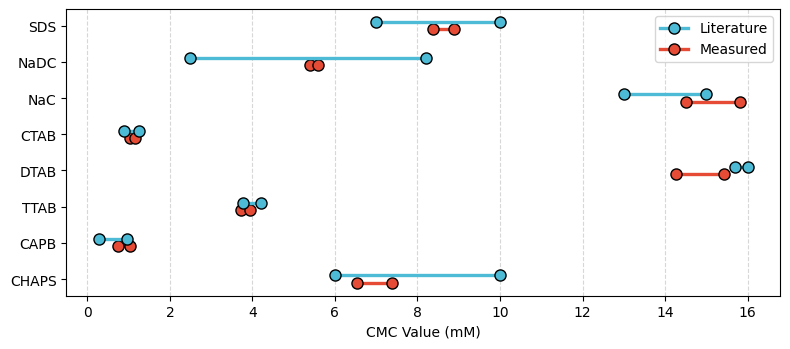

In [7]:
fig, ax = cmc.plot_cmc_comparison(table1, surfactant_col='surfactant_1')
# save the figure
fig.savefig('figures/Figure_3.png', dpi=300)

plt.show()

/Users/zeqing/0_Github/SDL5_CMC/CMC/All_data/CMC_helper_function.py:114: RuntimeWarning: overflow encountered in exp
  return A2 + (A1 - A2) / (1 + np.exp((x - x0) / dx))
/Users/zeqing/0_Github/SDL5_CMC/CMC/All_data/CMC_helper_function.py:128: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(boltzmann, conc, ratio, p0, maxfev=5000)


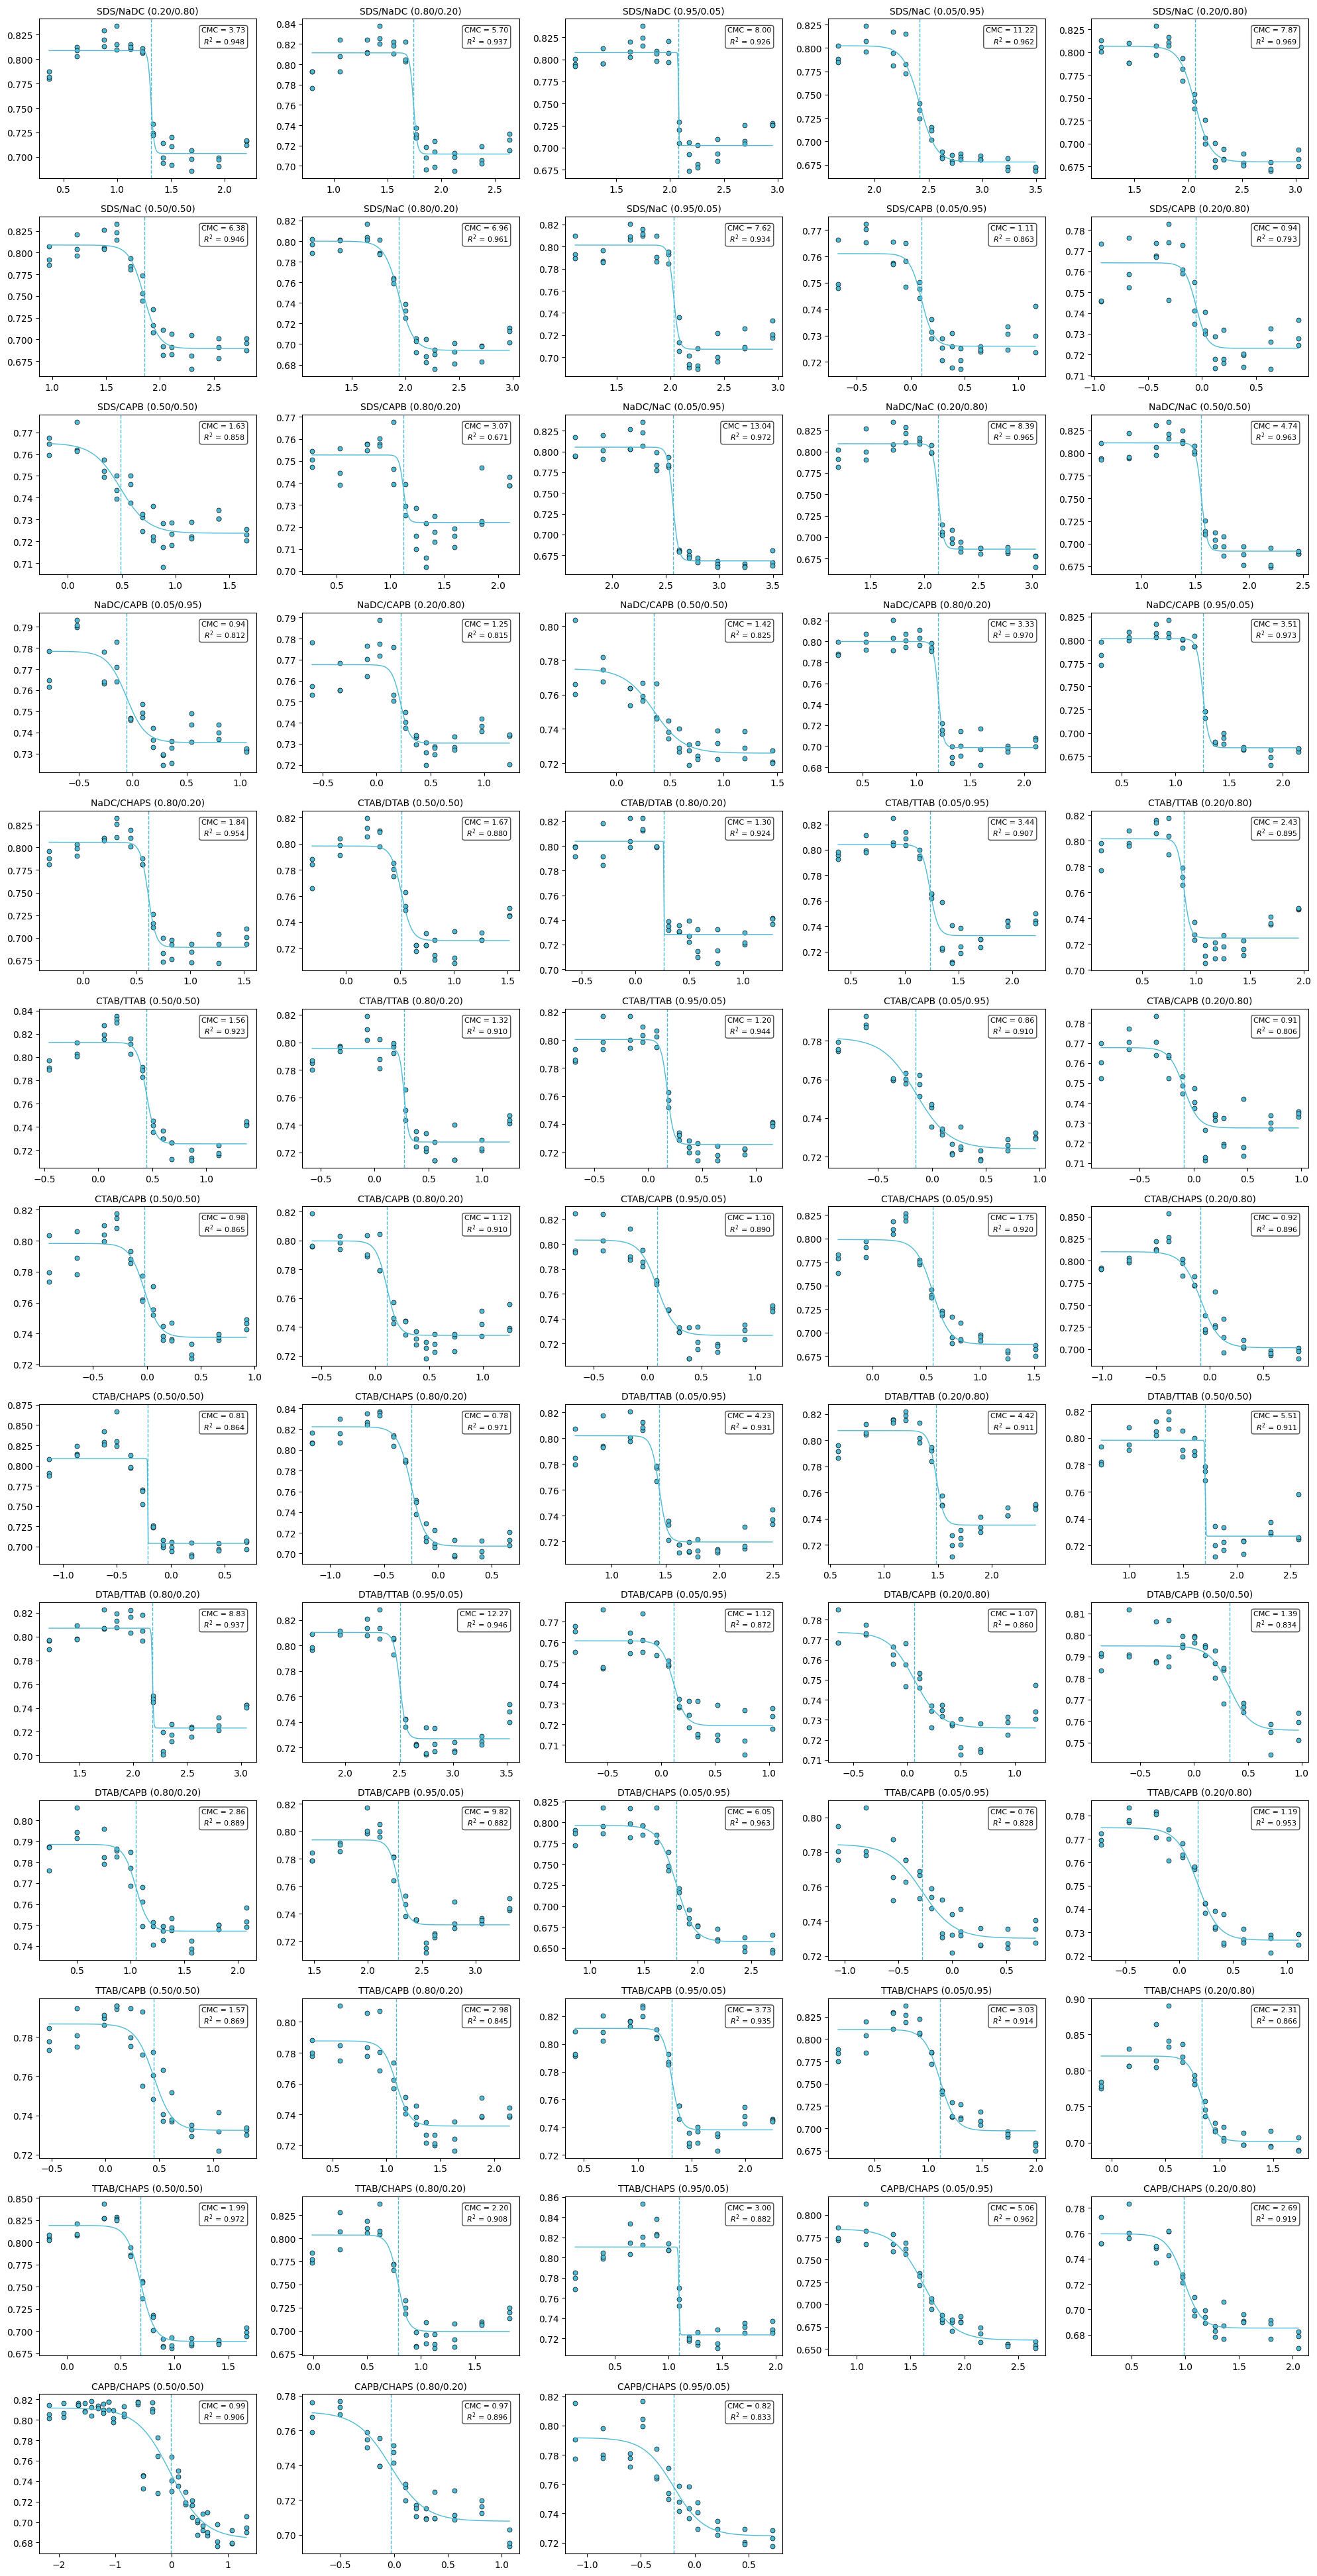

,surfactant_1,surfactant_1_ratio,surfactant_2,surfactant_2_ratio,CMC,R2
0,SDS,0.20,NaDC,0.80,3.728162,0.947698
1,SDS,0.80,NaDC,0.20,5.704390,0.936634
2,SDS,0.95,NaDC,0.05,8.000601,0.926120
3,SDS,0.05,NaC,0.95,11.215605,0.962448
4,SDS,0.20,NaC,0.80,7.872056,0.968804
...,...,...,...,...,...,...
58,CAPB,0.05,CHAPS,0.95,5.060144,0.962099
59,CAPB,0.20,CHAPS,0.80,2.690270,0.918776
60,CAPB,0.50,CHAPS,0.50,0.989354,0.906185
61,CAPB,0.80,CHAPS,0.20,0.971282,0.895713


In [8]:

df = mixed_CMC.copy()

# Column definitions
I1_COL = '334_373'
I3_COL = '334_384'
RATIO_COL = 'ratio'
SURF_1_COL = 'surfactant_1'
SURF_1_RATIO_COL = 'surfactant_1_ratio'
SURF_2_COL = 'surfactant_2'
SURF_2_RATIO_COL = 'surfactant_2_ratio'
ASSAY_COL = 'assay'
CONC_COL = 'concentration'

# Ensure ratio columns are numeric
df[SURF_1_RATIO_COL] = pd.to_numeric(df[SURF_1_RATIO_COL], errors='coerce')
df[SURF_2_RATIO_COL] = pd.to_numeric(df[SURF_2_RATIO_COL], errors='coerce')

# Surfactant ordering
SURFACTANT_ORDER = ['SDS', 'NaDC', 'NaC', 'CTAB', 'DTAB', 'TTAB', 'CAPB', 'CHAPS']
df[SURF_1_COL] = pd.Categorical(df[SURF_1_COL], categories=SURFACTANT_ORDER, ordered=True)
df[SURF_2_COL] = pd.Categorical(df[SURF_2_COL], categories=SURFACTANT_ORDER, ordered=True)

# Identify unique surfactant combinations (including ratios)
combos = (
    df[[SURF_1_COL, SURF_2_COL, SURF_1_RATIO_COL, SURF_2_RATIO_COL]]
      .drop_duplicates()
      .sort_values([SURF_1_COL, SURF_2_COL, SURF_1_RATIO_COL])
      .reset_index(drop=True)
)

# Prepare subplots
nplots = len(combos)
ncols = 5
nrows = int(np.ceil(nplots / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3), squeeze=False)

# -- NEW: prepare to collect CMC & R2 results --
results = []

# Loop through each combination
for idx, combo in combos.iterrows():
    surf1 = combo[SURF_1_COL]
    surf2 = combo[SURF_2_COL]
    # Cast ratios to float for formatting
    r1 = float(combo[SURF_1_RATIO_COL])
    r2 = float(combo[SURF_2_RATIO_COL])
    ax = axes[idx // ncols, idx % ncols]

    # Filter data for this specific combo
    sub = df[
        (df[SURF_1_COL] == surf1) &
        (df[SURF_2_COL] == surf2) &
        (df[SURF_1_RATIO_COL] == r1)
    ]
    conc = sub[CONC_COL].values
    ratio_vals = sub[RATIO_COL].values

    # Generate plot and capture CMC & R2
    cmc_values, r2_fit = cmc.CMC_plot(ax, ratio_vals, conc, log=1, plot=1)
    ax.set_title(f"{surf1}/{surf2} ({r1:.2f}/{r2:.2f})", fontsize=10)

    # -- NEW: append this combo's results --
    results.append({
        SURF_1_COL:       surf1,
        SURF_1_RATIO_COL: r1,
        SURF_2_COL:       surf2,
        SURF_2_RATIO_COL: r2,
        'CMC':            cmc_values,
        'R2':             r2_fit
    })

# Disable any unused subplots
for j in range(nplots, nrows * ncols):
    axes[j // ncols, j % ncols].axis('off')

plt.tight_layout()
plt.show()

# -- NEW: create a DataFrame of the results --
results_df = pd.DataFrame(results)
fig.savefig('figures/mixed_CMC_curve.png', dpi=300)

results_df.to_excel("figures/mixed_CMC_results.xlsx", index=False)
results_df

In [9]:
results_df.describe()

,surfactant_1_ratio,surfactant_2_ratio,CMC,R2
count,63.000000,63.000000,63.000000,63.000000
mean,0.483333,0.516667,3.424142,0.902487
std,0.337687,0.337687,3.084877,0.056718
min,0.050000,0.050000,0.756029,0.670821
25%,0.200000,0.200000,1.118805,0.867380
50%,0.500000,0.500000,2.197917,0.910309
75%,0.800000,0.800000,4.578236,0.946030
max,0.950000,0.950000,13.038524,0.973410


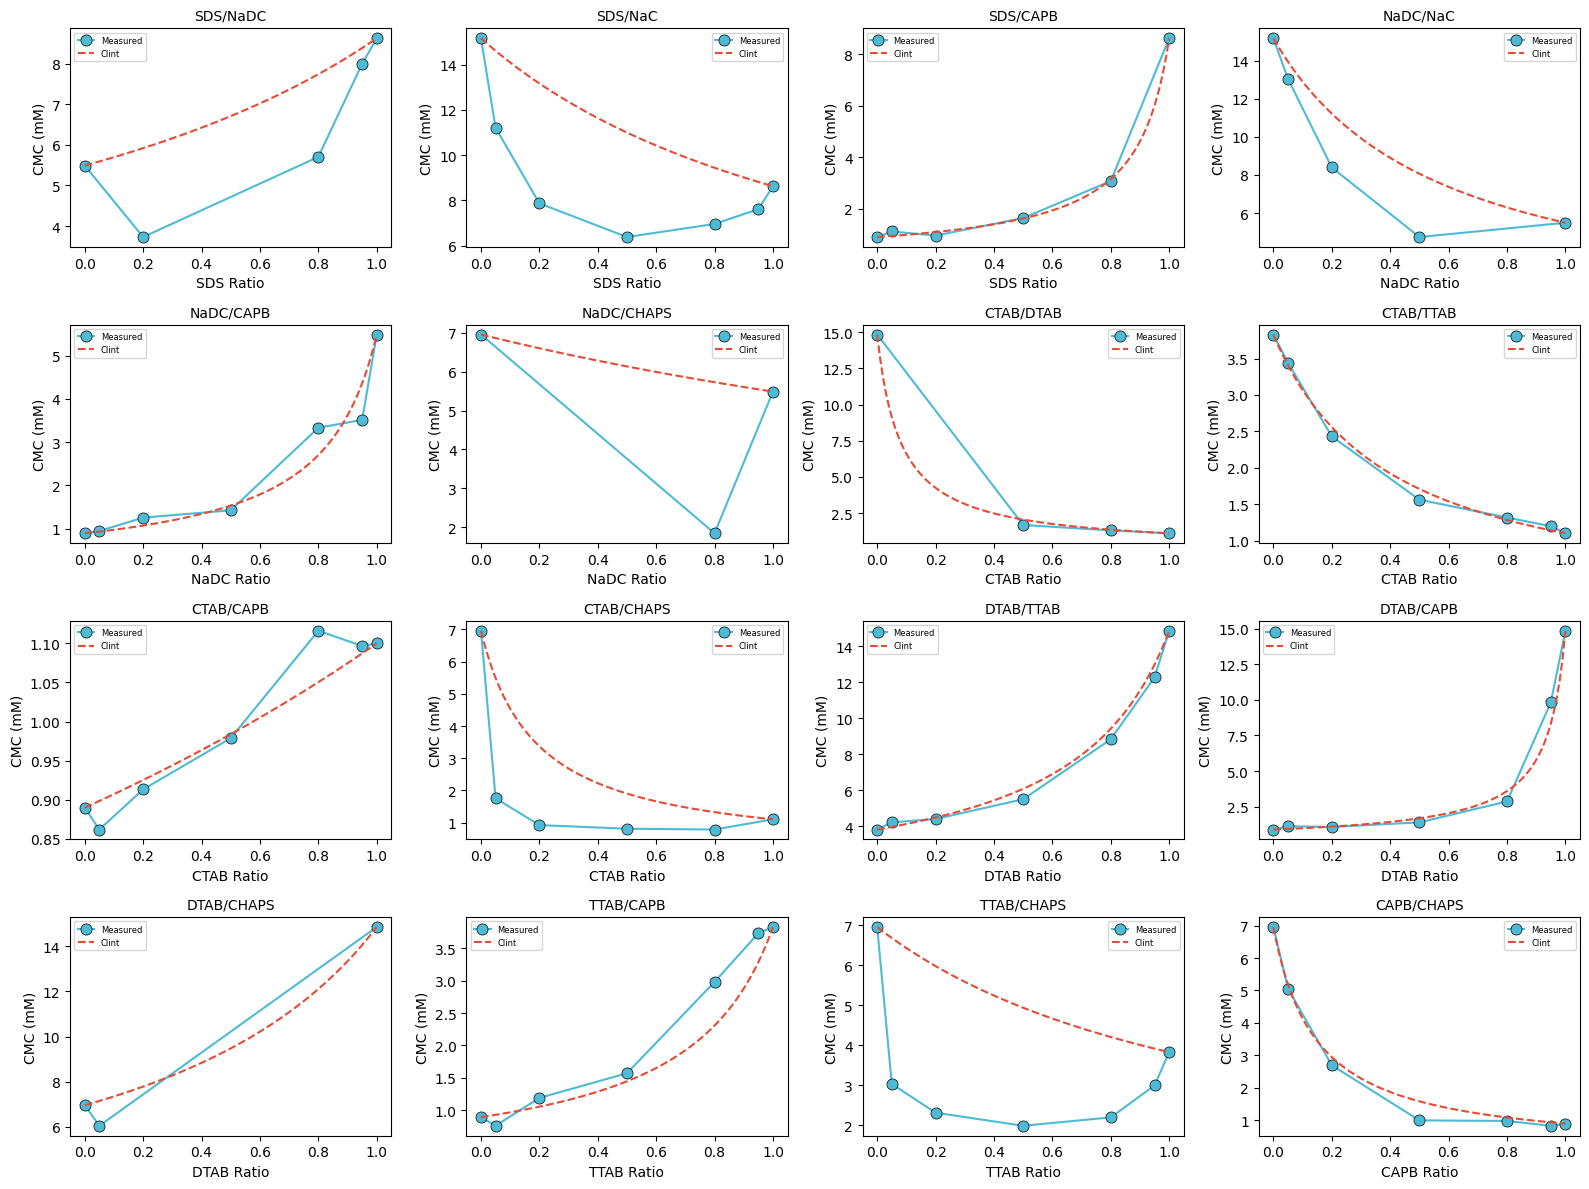

In [11]:
## test

fit_table = cmc.plot_cmc_vs_surf1_ratio(results_df, table1, Clint=True, ncols=4)
